In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori 
from mlxtend.preprocessing import TransactionEncoder
import re


In [64]:
# Step 1: Data Collection
df = pd.read_excel("data/online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [65]:
# Step 2: Data processing

# drop missing values
missing_data = df.dropna(subset=["Description","StockCode","Invoice"])

# remove stockCodes which start with 'C'
rm_data = missing_data[~missing_data['StockCode'].astype(str).str.startswith('C')]
transactions = rm_data.groupby('Invoice')['Description'].apply(list).values

# convert transactions to list and remove duplicates
transaction_list = [list(set(transaction)) for transaction in transactions]
print(f"======> Total Transactions: {len(transaction_list)} rows  <======", )

# find with 7 records
transaction_limit = transaction_list[:7]

unique_item_transactions = [item for transaction in transaction_limit for item in transaction]
count = len(unique_item_transactions)
print(f"======> Unique item transactions: {count} <======")

print("======> Items <======")
for transaction in transaction_limit:
    print(transaction)
    
    


======> Total Transactions: 25880 rows  <======
======> Unique item transactions: 92 <======
======> Items <======
['RECORD FRAME 7" SINGLE SIZE ', 'PINK CHERRY LIGHTS', '15CM CHRISTMAS GLASS BALL 20 LIGHTS', ' WHITE CHERRY LIGHTS', 'SAVE THE PLANET MUG', 'FANCY FONT HOME SWEET HOME DOORMAT', 'STRAWBERRY CERAMIC TRINKET BOX', 'PINK DOUGHNUT TRINKET POT ']
['DOG BOWL , CHASING BALL DESIGN', 'HEART MEASURING SPOONS LARGE', 'LUNCHBOX WITH CUTLERY FAIRY CAKES ', 'CAT BOWL ']
['HEART IVORY TRELLIS LARGE', 'SCOTTIE DOG HOT WATER BOTTLE', 'SET OF 3 BLACK FLYING DUCKS', 'BLACK DINER WALL CLOCK', 'CHRISTMAS CRAFT WHITE FAIRY ', 'HOME BUILDING BLOCK WORD', 'ASSORTED COLOUR BIRD ORNAMENT', 'HEART FILIGREE DOVE LARGE', ' PEACE WOODEN BLOCK LETTERS', 'LOVE BUILDING BLOCK WORD', 'CLASSIC WHITE FRAME', 'PLEASE ONE PERSON  METAL SIGN', 'AREA PATROLLED METAL SIGN', 'BISCUITS SMALL BOWL LIGHT BLUE', 'BATH BUILDING BLOCK WORD', 'PIZZA PLATE IN BOX', 'DOOR MAT BLACK FLOCK ', 'SMALL MARSHMALLOWS PINK BOWL'

In [66]:
# Step 3 : Show Binary matrix and ensure all items in each transactions no duplicate

# ensure all items are string
str_transaction = [[str(item) for item in set(transaction)] for transaction in transactions]

tranEncode = TransactionEncoder()
tranEncodeArray = tranEncode.fit(transaction_limit).transform(transaction_limit)
binary_matrix = pd.DataFrame(tranEncodeArray, columns=tranEncode.columns_)
print("======> Binary Matrix <====== \n" , binary_matrix.astype(int))

======> Binary Matrix <====== 
     PEACE WOODEN BLOCK LETTERS   VINTAGE DESIGN GIFT TAGS  \
0                            0                          0   
1                            0                          0   
2                            1                          0   
3                            0                          0   
4                            0                          0   
5                            0                          1   
6                            0                          0   

    WHITE CHERRY LIGHTS  15CM CHRISTMAS GLASS BALL 20 LIGHTS  \
0                     1                                    1   
1                     0                                    0   
2                     0                                    0   
3                     0                                    0   
4                     0                                    0   
5                     0                                    0   
6                     0        

In [67]:
# Step 4: Generate Frequent Itemsets Using Apriori
target_support = 0.1

min_confidence = 0.35
min_lift = 1
min_support = target_support * 7 / 92

results = list(apriori(str_transaction, min_support=min_support,min_confidence=min_confidence,min_lift=min_lift))

print(f"Size of Result: {len(results)}")
print("=====> Association Rules <=====")
for result in results:
    items = list(result.items)  
    support = result.support
    for ordered_stat in result.ordered_statistics:
        antecedent = list(ordered_stat.items_base)
        consequent = list(ordered_stat.items_add)
        confidence = ordered_stat.confidence
        lift = ordered_stat.lift
        if antecedent and consequent:
            print(f"Rule: {antecedent} -> {consequent}")
            print(f"Support: {support:.4f}\nConfidence: {confidence:.4f}\nLift: {lift:.4f}")
            print("-" * 30)


Size of Result: 323
=====> Association Rules <=====
Rule: ['60 CAKE CASES VINTAGE CHRISTMAS'] -> ['PAPER CHAIN KIT VINTAGE CHRISTMAS']
Support: 0.0085
Confidence: 0.4630
Lift: 17.2410
------------------------------
Rule: ['60 CAKE CASES VINTAGE CHRISTMAS'] -> ['SET OF 20 VINTAGE CHRISTMAS NAPKINS']
Support: 0.0092
Confidence: 0.5053
Lift: 24.3970
------------------------------
Rule: ['SET OF 20 VINTAGE CHRISTMAS NAPKINS'] -> ['60 CAKE CASES VINTAGE CHRISTMAS']
Support: 0.0092
Confidence: 0.4459
Lift: 24.3970
------------------------------
Rule: ['60 TEATIME FAIRY CAKE CASES'] -> ['72 SWEETHEART FAIRY CAKE CASES']
Support: 0.0183
Confidence: 0.3525
Lift: 10.4367
------------------------------
Rule: ['72 SWEETHEART FAIRY CAKE CASES'] -> ['60 TEATIME FAIRY CAKE CASES']
Support: 0.0183
Confidence: 0.5412
Lift: 10.4367
------------------------------
Rule: ['PACK OF 60 DINOSAUR CAKE CASES'] -> ['60 TEATIME FAIRY CAKE CASES']
Support: 0.0162
Confidence: 0.5866
Lift: 11.3122
------------------

In [68]:
# Step 5 :  display frequent Items in DataFrame

results_df = pd.DataFrame([(tuple(result.items), result.support) 
                           for result in results], 
                          columns=['Itemset', 'Support'])
print("===> Frequent DataFrame <====\n",results_df)



===> Frequent DataFrame <====
                                                Itemset   Support
0    (60 CAKE CASES VINTAGE CHRISTMAS, PAPER CHAIN ...  0.008462
1    (SET OF 20 VINTAGE CHRISTMAS NAPKINS, 60 CAKE ...  0.009235
2    (60 TEATIME FAIRY CAKE CASES, 72 SWEETHEART FA...  0.018277
3    (60 TEATIME FAIRY CAKE CASES, PACK OF 60 DINOS...  0.016229
4    (60 TEATIME FAIRY CAKE CASES, PACK OF 60 MUSHR...  0.010742
..                                                 ...       ...
318  (WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA...  0.012172
319  (WOODEN FRAME ANTIQUE WHITE , WOOD S/3 CABINET...  0.008733
320  (WOODEN PICTURE FRAME WHITE FINISH, WOOD S/3 C...  0.008114
321  (WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA...  0.009080
322  (WOODEN PICTURE FRAME WHITE FINISH, WOOD S/3 C...  0.008849

[323 rows x 2 columns]


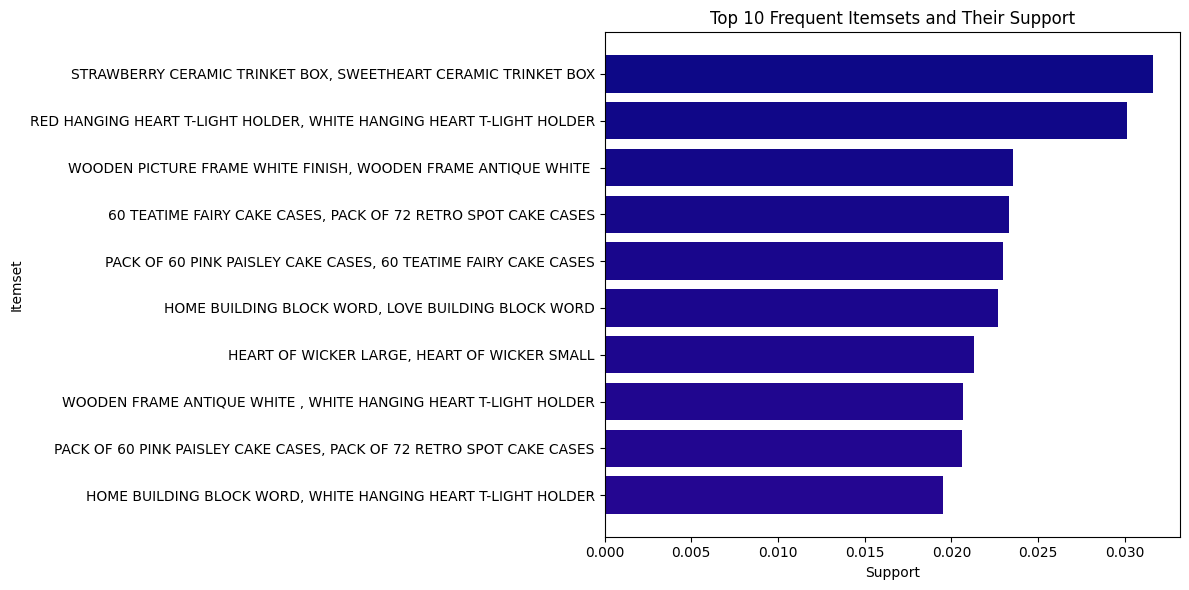

In [ ]:
# display graphic of frequent dataframe

results_df['Itemset_str'] = results_df['Itemset'].apply(lambda x: ', '.join(x))

top_10_results = results_df.sort_values(by='Support', ascending=False).head(10)
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot
plt.barh(top_10_results['Itemset_str'], top_10_results['Support'], color=plt.cm.plasma(range(256)))

# Title and labels
plt.title('Top 10 Frequent Itemsets and Their Support')
plt.xlabel('Support')
plt.ylabel('Itemset')

# Invert y-axis to have the most frequent itemset on top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()